In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el fichero de python con las funciones para representar las gráficas:
import sys
sys.path.append("..")
from utils.viztools import *

In [2]:
# Cambiamos nuestra variable df al nuevo dataframe limpio:
df = pd.read_csv("../data/Metabolic_Syndrome_clean.csv", index_col=[0])
df.sample(2)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
399,63723,62,Mujer,Casado,2000.0,Norteamericana,101.8,32.1,1,30.91,8.4,151,41,190,1
1958,70122,37,Mujer,Casado,6200.0,Blanca,128.3,43.6,0,8.15,5.0,102,72,114,0


### DEFINICIÓN Y TIPIFICACIÓN DE VARIABLES

In [80]:
# Vamos a obtener la cardinalidad, su porcentaje y el tipo de variable según la cardinalidad:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100]).T.rename(columns = {0: "Card", 1: "%_Card"})
df_tipificacion["Tipo_variable"] = "Categórica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Tipo_variable"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Tipo_variable"] ="Numérica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Tipo_variable"] = "Numérica Continua"
df_tipificacion

,Card,%_Card,Tipo_variable
Id,2401.0,100.000000,Numérica Continua
Edad,61.0,2.540608,Numérica Discreta
Sexo,2.0,0.083299,Binaria
EstadoCivil,5.0,0.208247,Categórica
Ingresos,14.0,0.583090,Numérica Discreta
Etnia,6.0,0.249896,Categórica
CircunferenciaCintura,635.0,26.447314,Numérica Discreta
IMC,322.0,13.411079,Numérica Discreta
Albuminuria,3.0,0.124948,Categórica
CACu,1383.0,57.601000,Numérica Continua


| Columna/Variable      | Descripción                                                                | Tipo de variable  | Importancia inicial |
| --------------------- | -------------------------------------------------------------------------- | ----------------- | ------------------- |
| Id                    | Identificador del sujeto de estudio                                        | Índice único      |         3           |
| Edad                  | Edad del sujeto (años)                                                     | Numérica discreta |         3           |
| Sexo                  | Género del sujeto                                                          | Binaria           |         2           |
| EstadoCivil           | Estado civil del sujeto                                                    | Categórica        |         1           |
| Ingresos              | Ingresos económicos mensuales ($)                                          | Numérica discreta |         1           |
| Etnia                 | Etnia a la que pertenece el sujeto                                         | Categórica        |         1           |
| CircunferenciaCintura | Medida de la circunferencia de la cintura (cm)                             | Numérica discreta |         1           |
| IMC                   | Índice de Masa Corporal                                                    | Numérica discreta |         1           |
| Albuminuria           | Resultado del CACu: normal (0), moderadamente elevado (1), muy elevado (2) | Categórica        |         2           |
| CACu                  | Cociente albúmina-creatinina en orina (mg/g)                               | Numérica continua |         2           |
| AcidoUrico            | Ácido úricoe en sangre (mg/dL)                                             | Numérica discreta |         2           |
| GlucosaSangre         | Glucosa en sangre (mg/dL)                                                  | Numérica discreta |         2           |
| HDL                   | Colesterol HDL (mg/dL)                                                     | Numérica discreta |         1           |
| Trigliceridos         | Triglicéridos en sangre (mg/dL)                                            | Numérica discreta |         1           |
| SindromeMetabólico    | Diagnóstico de síndrome metabólico (1) o no (0)                            | Binaria           |         1           |

## ANÁLISIS UNIVARIANTE

### Variables categóricas

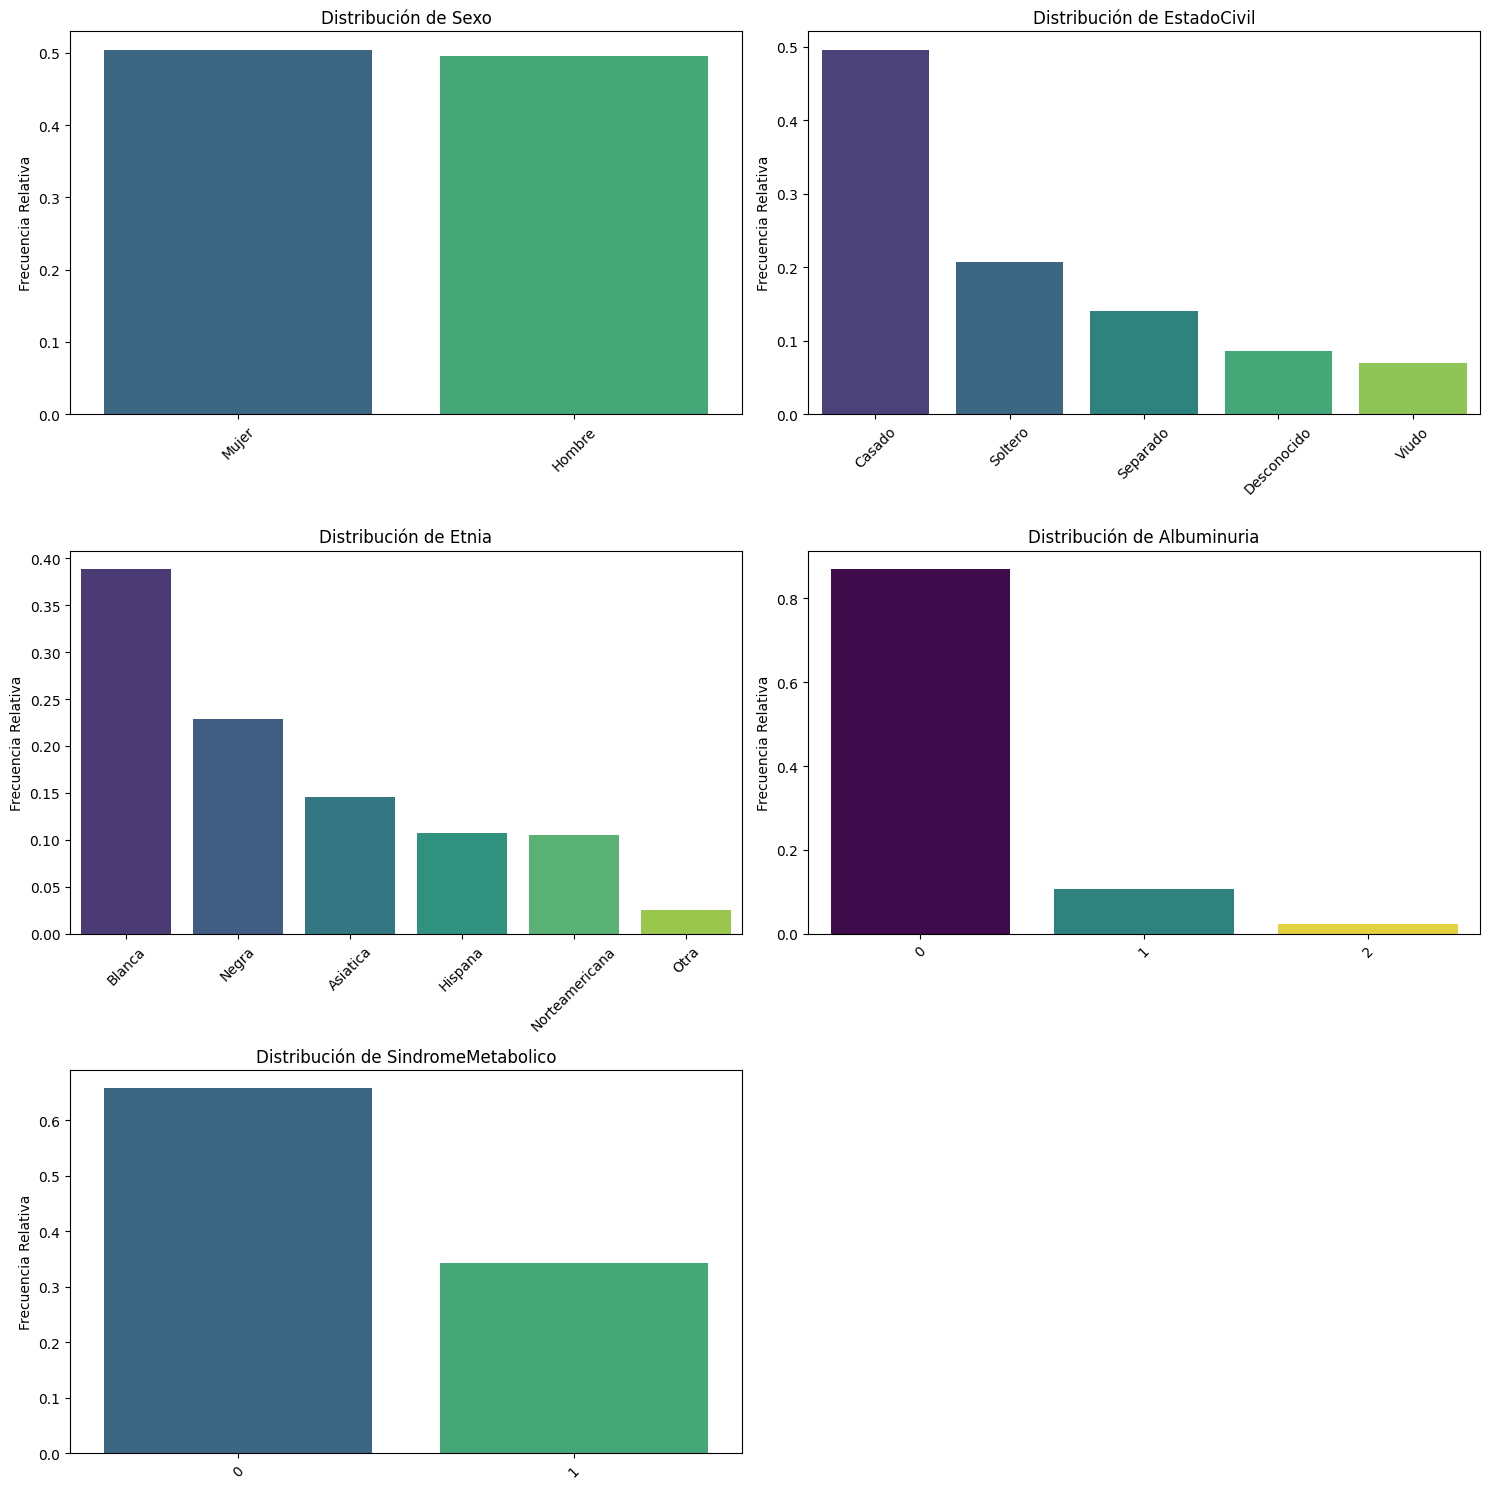

In [81]:
# Creamos una lista con todas las variables categóricas y mostramos su distribución:
columnas_categoricas = ["Sexo", "EstadoCivil", "Etnia", "Albuminuria", "SindromeMetabolico"]
distribucion_categoricas(df, columnas_categoricas, relativa = True)

In [82]:
# Obtenemos la moda de las columnas categóricas
df[columnas_categoricas].mode().T

,0
Sexo,Mujer
EstadoCivil,Casado
Etnia,Blanca
Albuminuria,0
SindromeMetabolico,0


In [83]:
# Miramos la frecuencia relativa "en números":
print("LA FRECUENCIA RELATIVA ES:")
for col in columnas_categoricas:
    print(df[col].value_counts()/len(df)*100)
    print("")

LA FRECUENCIA RELATIVA ES:
Sexo
Mujer     50.437318
Hombre    49.562682
Name: count, dtype: float64

EstadoCivil
Casado         49.645981
Soltero        20.741358
Separado       14.035818
Desconocido     8.663057
Viudo           6.913786
Name: count, dtype: float64

Etnia
Blanca            38.858809
Negra             22.823823
Asiatica          14.535610
Hispana           10.703873
Norteamericana    10.537276
Otra               2.540608
Name: count, dtype: float64

Albuminuria
0    87.005414
1    10.578925
2     2.415660
Name: count, dtype: float64

SindromeMetabolico
0    65.764265
1    34.235735
Name: count, dtype: float64



No obtenemos demasiados datos al estudiar estas variables de forma individual. Aun así, podemos destacar:
- La mayor parte de la muestra tiene índices normales de albuminuria, sería interesante cruzar esa categoría con la columna de SindromeMetabolico.
- Casi el 50% de los sujetos están casados, podemos ver qué relación tiene con la columna de Ingresos y con la de SindromeMetabolico.
- Hay mitad de hombres y mitad de mujeres.
- Casi un 40% son de etnia blanca, habrá que ver qué distribución de positivos hay en cada etnia.

### Variables numéricas

(9, 2)


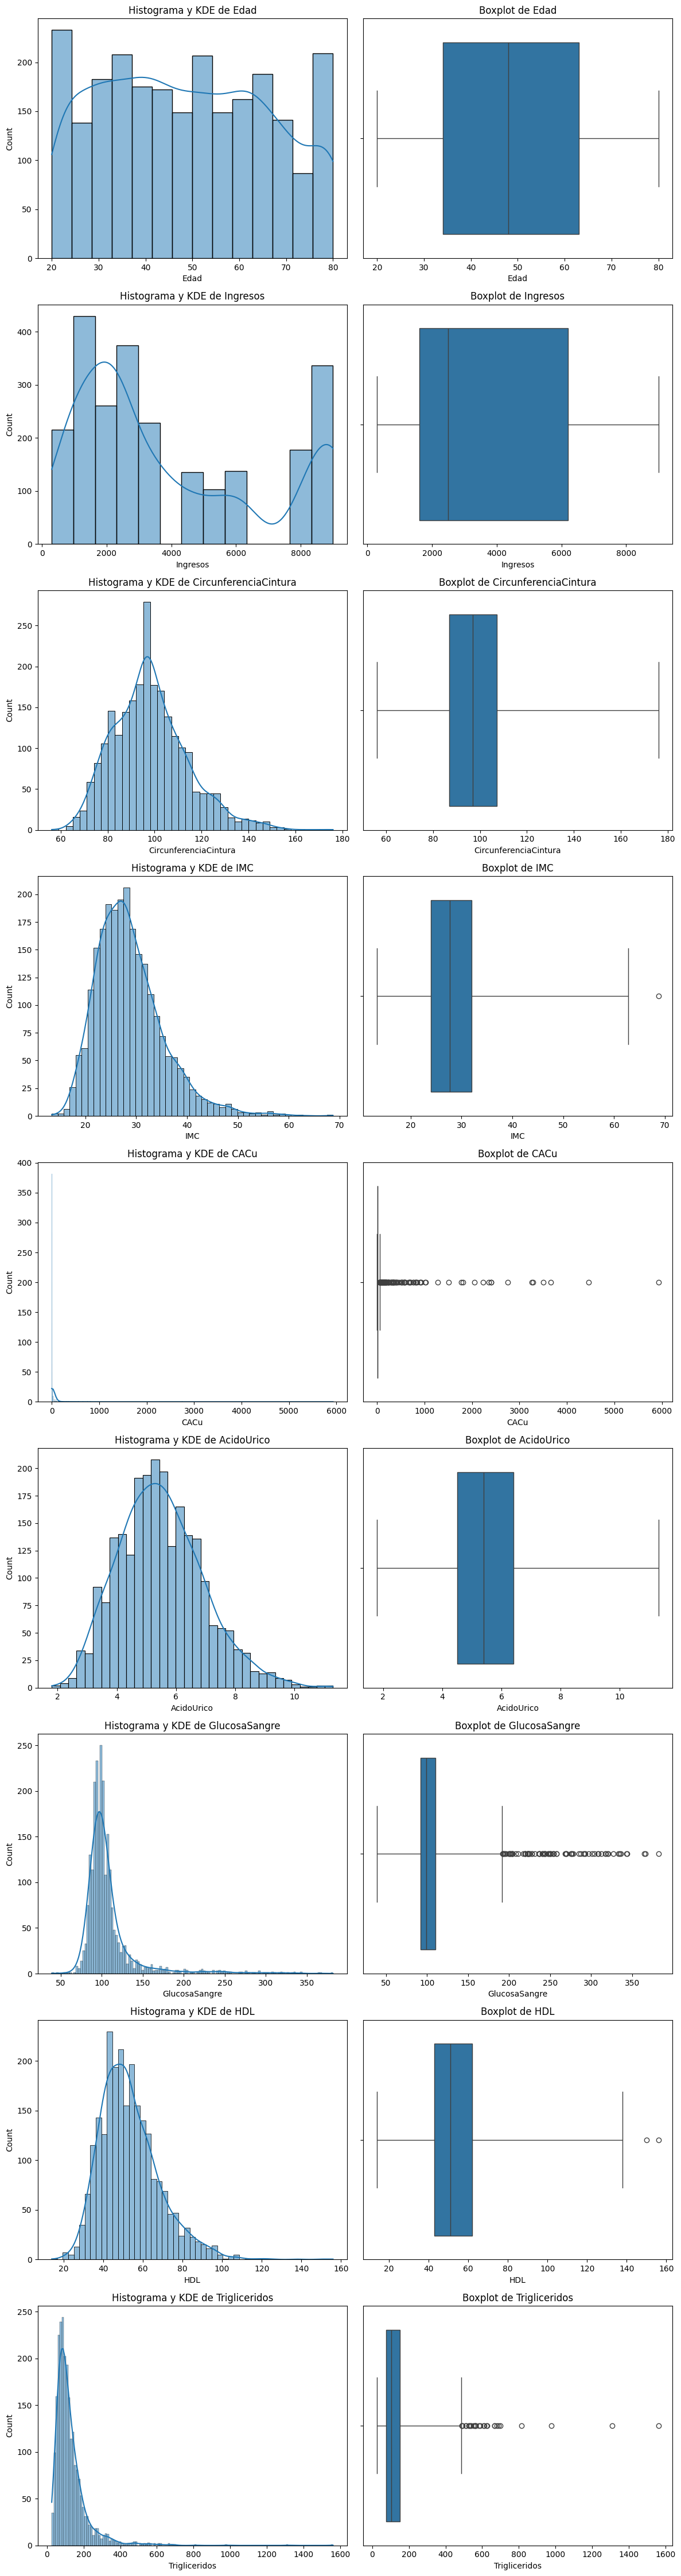

In [84]:
# Creamos una lista con todas las variables numéricas de nuestro dataset:
columnas_numericas = ['Edad', 'Ingresos', 'CircunferenciaCintura', 'IMC', 'CACu', 'AcidoUrico', 'GlucosaSangre', 'HDL', 'Trigliceridos']
histograma_caja_bigotes(df, columnas_numericas, whisker_width = 4.5)

In [85]:
# Obtenemos todos los valores descriptivos de las columnas numéricas:
df[columnas_numericas].describe()

,Edad,Ingresos,CircunferenciaCintura,IMC,CACu,AcidoUrico,GlucosaSangre,HDL,Trigliceridos
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,3931.903374,98.260975,28.691337,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2899.305678,15.964061,6.626869,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,87.000000,24.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.200000,32.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,5928.000000,11.300000,382.000000,156.000000,1562.000000


**Edad:**
- El 50% de los sujetos tienen entre 33 y 63 años, pero la muestra está bastante repartida.

**Ingresos:**
- Hay un grupo muy grande con ingresos alrededor de 2000$.
- Sería interesante dividir los ingresos en 3: de 0 a 3000, de 3000 a 6000 y de 6000 a 9000, para cruzar esta variable con la columna de SindromeMetabolico.

**CircunferenciaCintura:**
- El 50% de los sujetos tienen un valor entre 85 y 110 cm.
- Aparecen valores hasta los 180 cm.

**IMC:**
- La mayor parte de los sujetos tienen un IMC de entre 22 y 30. 
- Obtenemos un outlier (revisaremos si es un error).

**CACu:**
- En esta columna tenemos muchos outliers. Como los valores de Albuminuria dependen de esta columna, es posible que la eliminemos y nos quedemos con la de Albuminuria únicamente.

**AcidoUrico:**
- La mayor parte de valores están entre 4 y 6. 

**GlucosaSangre:**
- El 50% de la muestra está alrededor de 100, pero vemos una distribución poco homogénea.
- Encontramos muchos outliers, por lo que podríamos hacer un estudio sin outliers y con los outliers por separado.

**HDL:**
- Encontramos solo 2 outliers que podríamos investigar, aunque no se van mucho, comprobaremos si son un error o cuadran con el resto de valores de los sujetos.

**Trigliceridos:**
- El 50% de la muestra se encuentra entre 80 y 200. 
- También tenemos muchos outliers en esta columna. Algunos son muy exagerados, los investigaremos para ver si se trata de un error. 


In [86]:
# Eliminamos la columna de CACu
df.drop(columns = "CACu", inplace = True)

In [87]:
# Vamos a comprobar si el ourlier de IMC es un error:
df.loc[df["IMC"].idxmax()]

Id                        62849
Edad                         40
Sexo                      Mujer
EstadoCivil              Casado
Ingresos                 9000.0
Etnia                     Negra
CircunferenciaCintura     163.5
IMC                        68.7
Albuminuria                   0
AcidoUrico                  5.6
GlucosaSangre               107
HDL                          49
Trigliceridos                61
SindromeMetabolico            1
Name: 169, dtype: object

Parece que la circunferencia sí coincide con una persona con obesidad, aunque los valores sanguíneos y de orina parecen bastante normales. Vamos a contar con que es un outlier, pero no vamos a eliminarlo.

In [88]:
# Vamos a mirar los outliers de HDL, para ver si son un error:
df.sort_values("HDL", ascending = False).head(2)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
1310,67487,75,Mujer,Viudo,1000.0,Negra,97.0,26.7,1,7.4,108,156,64,0
220,63064,61,Hombre,Separado,1000.0,Negra,87.2,18.7,1,7.1,105,150,74,0


Los valores de HDL son completamente compatibles con el resto de datos de los sujetos, así que no parece que haya ningún error. Tampoco vamos a eliminarlos.

In [89]:
# Los outliers de Trigliceridos se alejaban bastante del resto de valores, vamos a ver esas entradas en concreto:
df.sort_values("Trigliceridos", ascending = False).head(10)

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico
2092,70617,45,Mujer,Desconocido,2000.0,Blanca,102.2,28.1,0,6.5,75,27,1562,1
1016,66268,58,Hombre,Casado,9000.0,Blanca,97.6,28.5,0,4.9,126,28,1311,1
829,65506,50,Hombre,Soltero,1600.0,Norteamericana,92.9,27.6,2,4.2,335,35,979,1
2196,71062,52,Hombre,Separado,1000.0,Blanca,114.2,33.4,2,8.1,128,29,814,1
2076,70562,52,Hombre,Desconocido,300.0,Blanca,103.5,24.9,0,5.4,91,52,700,0
1740,69272,43,Mujer,Desconocido,1600.0,Hispana,90.2,28.1,0,5.0,318,32,688,1
681,64930,74,Hombre,Separado,1600.0,Blanca,107.2,27.9,2,7.6,140,21,681,1
148,62757,54,Hombre,Separado,6200.0,Blanca,127.7,36.1,0,5.1,98,34,668,1
1979,70210,47,Hombre,Viudo,2000.0,Norteamericana,105.7,30.2,1,3.9,219,32,666,1
650,64803,35,Hombre,Casado,2500.0,Blanca,104.8,29.1,0,6.8,108,27,626,1


Vamos a eliminar los 2 outliers más alejados, ya que se alejan demasiado de la mayoría de valores de esa columna y no nos interesan especialmente esos valores, puesto que valores tan altos en triglicéridos indican otras patologías que no recogemos en este dataset.

In [90]:
# Procedemos a eliminar esos dos outliers
indices_outliers_trigli = df.sort_values("Trigliceridos", ascending = False).head(2).index
df.drop(index = indices_outliers_trigli, inplace = True)

Una vez hemos limpiado esos outliers, vamos a volver a sacar las gráficas, para ver cómo queda:

(8, 2)


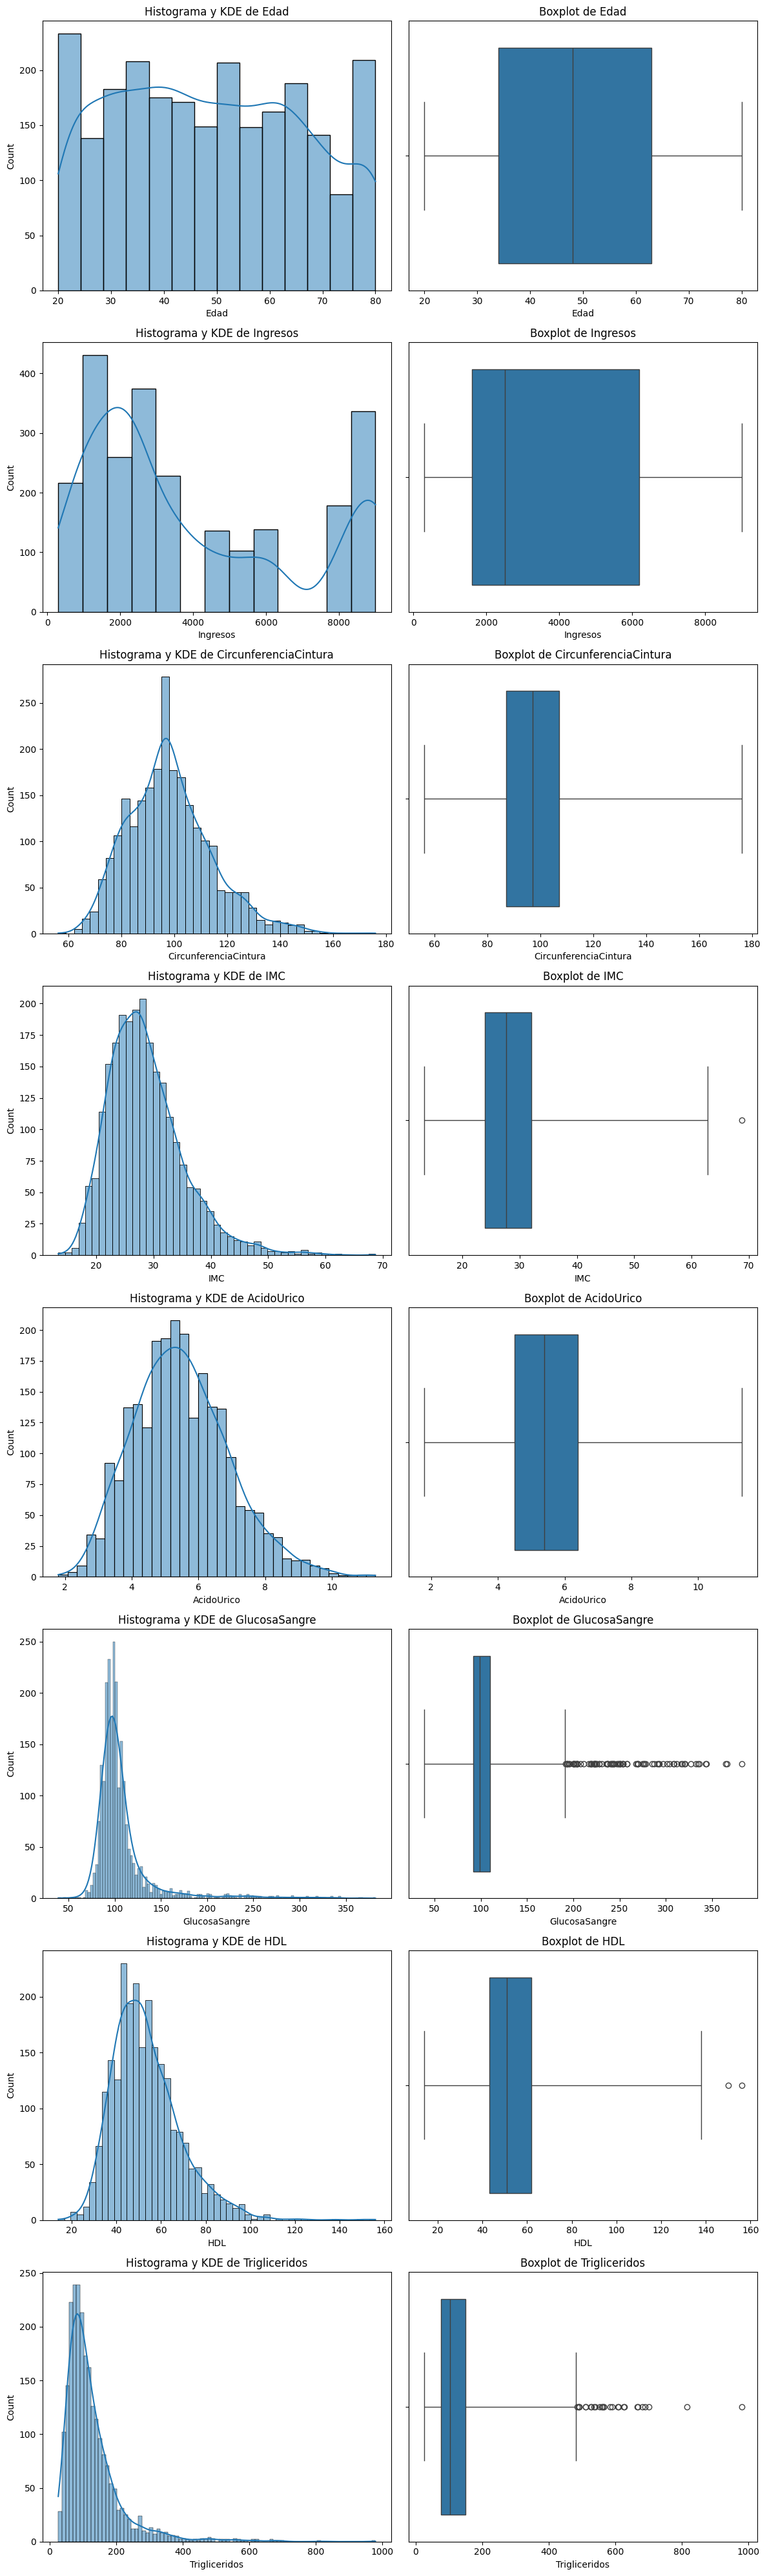

In [91]:
# Quitamos la columna CACu de nuestra lista de columnas numéricas y volvemos a sacar las gráficas de tendencia:
columnas_numericas = ['Edad', 'Ingresos', 'CircunferenciaCintura', 'IMC', 'AcidoUrico', 'GlucosaSangre', 'HDL', 'Trigliceridos']
histograma_caja_bigotes(df, columnas_numericas, whisker_width = 4.5)

In [92]:
# Guardamos nuestro dataset ya completamente limpio en un csv nuevo:
df.to_csv("../data/Metabolic_Syndrome_final_version.csv")